# Data Science Pragmatic programming Modelling in Python


Code snippets for quick consult (copy n paste)

In [7]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [8]:
!pwd

/home/leandroohf/Documents/leandro/ds_pragmatic_programming


## Model validation

* k-fold
* split train, val n test

## Sampling Imbalance data


Install imbalanced-learn
```sh
conda install -c conda-forge imbalanced-learn 
```



https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

<img src="images/resampling.png" width="800" align="left"/>


Types of sampling

* Under
    * Random  (code snippet)
    * Tomek links  (TODO) (This can be usefull for KNNN or SVM to define better regions)

<img src="images/tomek.png" width="800" align="left"/>  


* Over
    * Random (code snippet)
    * SMOTE  (TODO)


<img src="images/smote.png" width="800" align="left"/>   
    

* **Genreate unbalanced data**

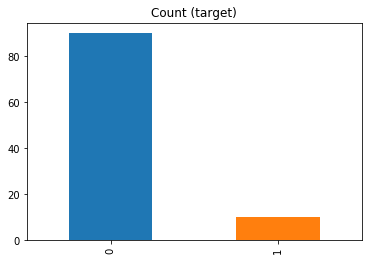

In [9]:
from sklearn.datasets import make_classification


X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)');

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

* **Random under sampling**

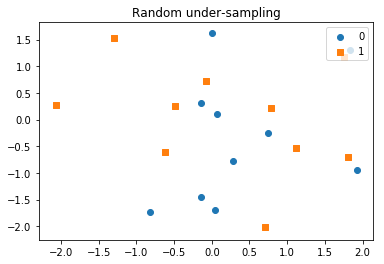

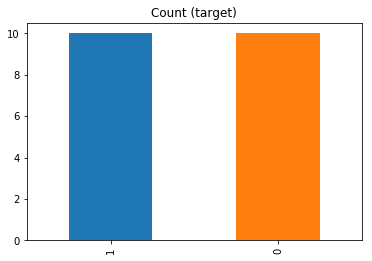

In [10]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

df2 = pd.DataFrame(X_rus)
df2['target'] = y_rus
df2.target.value_counts().plot(kind='bar', title='Count (target)');


* **Random over sampling**

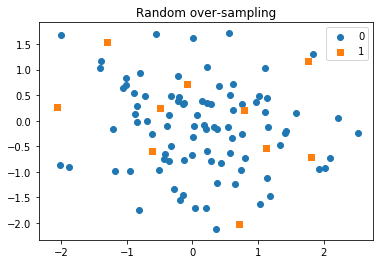

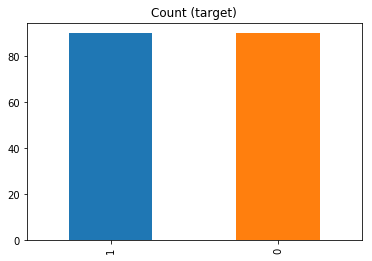

In [11]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)


plot_2d_space(X_ros, y_ros, 'Random over-sampling')

df2 = pd.DataFrame(X_ros)
df2['target'] = y_ros
df2.target.value_counts().plot(kind='bar', title='Count (target)');


## Model tunning

    1. gridseach
    2. sthocastic search
    3. bobh Auto-ml


## Evaluation metrics

### Accuracy  and confusion matrix

In [12]:
## Accuracy 

from sklearn.metrics import accuracy_score, confusion_matrix
from tabulate import tabulate

np.random.seed(2018)

y_true = np.random.uniform(size=7) > .5
y_pred = np.random.uniform(size=7) > .4

acc = accuracy_score(y_true, y_pred)
print('Fake data')
print('y_true: {}'.format(y_true))
print('y_pred: {}'.format(y_pred))

print('accuracy: {}'.format(acc))

cf_m = confusion_matrix(y_true, y_pred)

cf_df = pd.DataFrame(cf_m, index=["Actual Positive", "Actual Negative"], columns = ["Predicted Positive", "Predicted Negative"])
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

FPR = fp/(fp+tn)
FNR = fn/(tp+fn)

print(tabulate(cf_df, tablefmt="orgtbl",
               headers="keys"))


print()
print('FPR: {}'.format(FPR))
print('FNR: {}'.format(FNR))

print()


Fake data
y_true: [ True False  True False False  True  True]
y_pred: [ True  True False  True  True  True False]
accuracy: 0.2857142857142857
|                 |   Predicted Positive |   Predicted Negative |
|-----------------+----------------------+----------------------|
| Actual Positive |                    0 |                    3 |
| Actual Negative |                    2 |                    2 |

FPR: 1.0
FNR: 0.5



=================================

For markdwon cells, insert the code in a markdown cell. 

```python
\{\{print(tabulate(cf_df, headers="keys", tablefmt="html"))\}\}
```

{{print(tabulate(cf_df, headers="keys", tablefmt="html"))}}


### Precision Recall Curve, AUC and F score


####  Downsampling data example

Does need to run one time int he case we do not have data/creditcard_downsampled.csv.tar.bz2.

Also is an example of downsampling data.

Data downloaded from:
https://www.kaggle.com/mlg-ulb/creditcardfraud


* The original imbalance ratio (492:284315): 0.002
* Downsample the majority to reach the ratio 1:3 , just to have small data set

In [14]:
## Does not need to run this again once you have credicard_downsampled.csv.tar.bz2
creditcard_df = pd.read_csv('data/creditcard.csv.zip', compression='zip', sep=',', quotechar='"')

creditcard_df.sample(3).head(3)

n_pos = np.sum(creditcard_df.Class == True)
print('#positives: {}'.format(n_pos))

n_neg = np.sum(creditcard_df.Class == False)
print('#negatives: {}'.format(n_neg))

r = n_pos/(n_pos + n_neg)
print('Imbalance data ratio ({0}:{1}): {2:.3f}'.format(n_pos,n_neg,r))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284712,172704.0,0.470194,-1.619056,-2.258427,4.440719,0.202024,-0.458243,1.970565,-0.665303,-1.630737,...,0.603016,0.104952,-0.716836,0.121688,0.170587,0.082567,-0.218942,0.070955,787.95,0
108183,70800.0,-0.336279,0.237895,1.158456,-0.636549,-0.311637,-0.927103,0.216604,-0.403082,-0.869822,...,0.000923,0.143971,-0.129530,0.318251,-0.541146,-0.357414,-0.229982,-0.030124,24.20,0
29691,35588.0,-0.661606,1.170678,1.237694,-0.188206,0.164123,-0.605819,0.765953,-0.072226,-0.269068,...,-0.286087,-0.657133,-0.070964,-0.117952,-0.051093,0.105311,0.386870,0.175486,21.98,0


#positives: 492
#negatives: 284315
Imbalance data ratio (492:284315): 0.002


downsample both class to have smaller dataset

In [15]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = creditcard_df[creditcard_df.Class==0]
df_minority = creditcard_df[creditcard_df.Class==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2000,     # to match minority class
                                 random_state=123) # reproducible results
 

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled = df_downsampled.reset_index(drop=True)


# Saving
df_downsampled.to_csv('data/creditcard_downsampled.csv', index=False)

In [16]:
%%bash

# remove old file
rm -v data/creditcard_downsampled.csv.tar.bz2 
tar -cjvf  data/creditcard_downsampled.csv.tar.bz2 data/creditcard_downsampled.csv

rm -v data/creditcard_downsampled.csv

du -sh data/*

removed 'data/creditcard_downsampled.csv.tar.bz2'
data/creditcard_downsampled.csv
removed 'data/creditcard_downsampled.csv'
864K	data/audio0_hH79HnEdo.wav
864K	data/audio0KCVgexi4yU.wav
864K	data/audio0Q1JLNfm8oU.wav
864K	data/audio0vm7UpkSOnk.wav
864K	data/audio2M9GSksX_ho.wav
66M	data/creditcard.csv.zip
544K	data/creditcard_downsampled.csv.tar.bz2
4.0K	data/dict.csv
4.0K	data/edge-list.csv
5.2M	data/flights.db
1.6M	data/FremontBridge.csv
8.0K	data/logs.log
1.2M	data/Moby-Dick.txt
336K	data/ontology.json
4.0K	data/output.tsv
4.0K	data/output.txt
4.0K	data/people.csv
4.0K	data/people.json
40K	data/phone_data.csv
1.5M	data/test_signs.h5
13M	data/train_signs.h5
4.0K	data/users.parquet
140M	data/Weather


#### Load downsampled data

In [17]:
## load
creditcard_df = pd.read_csv('data/creditcard_downsampled.csv.tar.bz2', compression='bz2', 
                            sep=',', quotechar='"', index_col=False)

creditcard_df = creditcard_df.dropna()
creditcard_df[['Class','Amount']].describe()

creditcard_df['Class'] = creditcard_df.Class.astype(int)

creditcard_df.sample(3).head(3)

n_pos = np.sum(creditcard_df.Class == True)
print('#positives: {}'.format(n_pos))

n_neg = np.sum(creditcard_df.Class == False)
print('#negatives: {}'.format(n_neg))

r = n_pos/(n_pos + n_neg)
print('Imbalance data ratio ({0}:{1}): {2:.3f}'.format(n_pos,n_neg,r))

,Class,Amount
count,2492.000000,2492.000000
mean,0.197432,97.498427
std,0.398141,224.284179
min,0.000000,0.000000
25%,0.000000,3.597500
50%,0.000000,21.030000
75%,0.000000,89.990000
max,1.000000,3249.730000


,data/creditcard_downsampled.csv,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
321,122241.0,-0.170614,1.274014,2.236537,4.467599,-0.039297,0.711163,0.100481,0.243372,-1.596784,...,-0.123947,-0.384079,0.078550,-0.036550,-0.804647,0.077865,0.192769,0.175780,15.17,0
500,62263.0,-0.742894,0.787240,1.904695,1.064987,0.027265,0.389513,0.744168,0.235986,-0.740287,...,0.045461,0.175320,-0.191189,0.227292,0.434215,-0.208920,0.071592,0.064520,59.95,0
682,136093.0,-0.877106,1.999401,-3.522441,-1.323421,1.234826,-0.807607,0.705130,0.846215,-0.864392,...,0.580456,1.639720,-0.060483,-0.229421,-0.795074,0.118283,0.122198,0.231562,6.00,0


#positives: 492
#negatives: 2000
Imbalance data ratio (492:2000): 0.197


#### Training 2 models

In [18]:
from sklearn.model_selection import train_test_split

X = creditcard_df[creditcard_df.columns[:-1]]
y = creditcard_df[creditcard_df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018, test_size=0.3)


In [19]:
# random forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators = 15,max_depth=5,
                            random_state=0).fit(X_train, y_train)


lr = LogisticRegression().fit(X_train, y_train)


#### Precision n Recall Curves

Imbalance data ratio (492:2000): 0.197


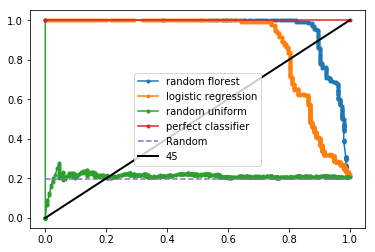

In [23]:
from sklearn.metrics import precision_recall_curve


y_true = y_test > 0.5
y_score_rf = rf.predict_proba(X_test)[:,-1]
y_score_lr = lr.predict_proba(X_test)[:,-1]

# random. is the imbalamnce ratio
# Just doinf the sim to prove that
np.random.seed(2018)
y_score_rd = np.random.uniform(size=y_test.shape[0])
y_score_perfect = y_test

r = n_pos/(n_pos + n_neg)
print('Imbalance data ratio ({0}:{1}): {2:.3f}'.format(n_pos,n_neg,r))

precision1, recall1, thrs1 = precision_recall_curve(y_true, y_score_rf)

precision2, recall2, thrs2 = precision_recall_curve(y_true, y_score_lr)

precision3, recall3, thrs3 = precision_recall_curve(y_true, y_score_rd)

precision4, recall4, thrs4 = precision_recall_curve(y_true, y_score_perfect)


plt.plot(recall1, precision1, marker='.',label='random florest');
plt.plot(recall2, precision2, marker='.', label='logistic regression');
plt.plot(recall3, precision3, marker='.', label='random uniform');
plt.plot(recall4, precision4, marker='.', label='perfect classifier');
plt.plot([0, 1], [r, r], linestyle='--',label='Random');
plt.plot([0, 1], [0, 1], color = 'black', linewidth = 2, label='45')
plt.legend();
                                              

In [24]:
# TODO: implement this later better. Give the options to pass multiple model for comparison
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
    

AUCPRC: 0.9584156721781121
f1 score: 0.9665775401069518


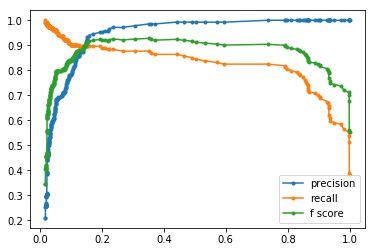

In [25]:
from sklearn.metrics import f1_score, auc

area = auc(recall1, precision1)

f = f1_score(y_true, y_score_rf > 0.5 , average='micro')

print('AUCPRC: {}'.format(area))
print('f1 score: {}'.format(f))


# precision_recall_curve returns precision  and recall as a array od shape = [n_thresholds + 1] 
thrs1.shape
recall1.shape
precision1.shape

precision = precision1[:-1]
recall = recall1[:-1]

precision.shape
recall.shape

f_scores = 2 * (precision * recall) / (precision + recall)

plt.plot(thrs1, precision, marker='.',label='precision');
plt.plot(thrs1, recall, marker='.', label='recall');
plt.plot(thrs1, f_scores, marker='.', label='f score');
plt.legend();

### EER: Equal error

In [26]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thr1 = roc_curve(y_true, y_score_rf)
fnr1 = 1.0 - tpr1

EER1_pos = np.argmin(abs(fnr1-fpr1))
EER1_thr1 = thr1[EER1_pos]

print('thr @ EER: {}'.format(EER1_thr1))
print('fpr @ EER: {}'.format(fpr1[EER1_pos]))
print('fnr @ EER: {}'.format(fnr1[EER1_pos]))


thr @ EER: 0.09090308538043898
fpr @ EER: 0.07407407407407407
fnr @ EER: 0.07792207792207795


## Model interpretation

TODO: 
    
1. importance plot
2. LIME

## Model report

* Graphs, statistics n tables to report to business (non-thecnicak) persons
* Prhases templates to use when describe n report the model performance (one per model type)
